# Olist dataset - e-commerce

### Importando bibliotecas
#### *Importing libraries*

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import datetime as dt
plt.style.use('ggplot')

df_olist=pd.read_csv('./datasets/olist_public_dataset_v2.csv')
df_olist_pay=pd.read_csv('./datasets/olist_public_dataset_v2_payments.csv')



###  1. Combinando datasets e corrigindo títulos de colunas
#### 1. *Combining datasets and correcting columns titles*

In [118]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100000 non-null  object 
 1   order_status                   100000 non-null  object 
 2   order_products_value           100000 non-null  float64
 3   order_freight_value            100000 non-null  float64
 4   order_items_qty                100000 non-null  int64  
 5   order_sellers_qty              100000 non-null  int64  
 6   order_purchase_timestamp       100000 non-null  object 
 7   order_aproved_at               99982 non-null   object 
 8   order_estimated_delivery_date  100000 non-null  object 
 9   order_delivered_customer_date  97595 non-null   object 
 10  customer_id                    100000 non-null  object 
 11  customer_city                  100000 non-null  object 
 12  customer_state                 

In [119]:
df_olist.columns

Index(['order_id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_aproved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_id', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [120]:
df_olist['order_purchase_timestamp'] = pd.to_datetime(df_olist['order_purchase_timestamp'])
df_olist['order_aproved_at'] = pd.to_datetime(df_olist['order_aproved_at'])
df_olist['order_estimated_delivery_date'] = pd.to_datetime(df_olist['order_estimated_delivery_date'])
df_olist['order_delivered_customer_date'] = pd.to_datetime(df_olist['order_delivered_customer_date'])
df_olist['review_creation_date'] = pd.to_datetime(df_olist['review_creation_date'])

df_olist['review_answer_timestamp'] = pd.to_datetime(df_olist['review_answer_timestamp'])


In [121]:
df_olist.rename(columns= {'order_aproved_at': 'order_approved_at','product_name_lenght': 'product_name_length', 'product_description_lenght':'product_description_length'}, inplace = True)

In [122]:
base_pt_en = pd.read_csv('./datasets/product_category_name_translation.csv')
base_pt_en_dic = dict(zip(base_pt_en['product_category_name'].tolist(),base_pt_en['product_category_name_english'].tolist()))
df_olist['categories_english'] = df_olist['product_category_name'].map(base_pt_en_dic)
df_olist['categories_english'] = df_olist['categories_english'].str.replace('_', " ")
df_olist['product_category_name'] = df_olist['product_category_name'].str.replace('_', " ")

In [123]:
df_olist.columns

Index(['order_id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_approved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_id', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'categories_english'],
      dtype='object')

In [124]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   order_id                       100000 non-null  object             
 1   order_status                   100000 non-null  object             
 2   order_products_value           100000 non-null  float64            
 3   order_freight_value            100000 non-null  float64            
 4   order_items_qty                100000 non-null  int64              
 5   order_sellers_qty              100000 non-null  int64              
 6   order_purchase_timestamp       100000 non-null  datetime64[ns]     
 7   order_approved_at              99982 non-null   datetime64[ns]     
 8   order_estimated_delivery_date  100000 non-null  datetime64[ns]     
 9   order_delivered_customer_date  97595 non-null   datetime64[ns]     
 10  customer_

In [125]:
df_olist_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104848 entries, 0 to 104847
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      104848 non-null  object 
 1   installments  104848 non-null  int64  
 2   sequential    104848 non-null  int64  
 3   payment_type  104848 non-null  object 
 4   value         104848 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [126]:
dict_order_installements= dict(zip(df_olist_pay['order_id'],df_olist_pay['installments']))


In [127]:
dict_order_payment_type= dict(zip(df_olist_pay['order_id'],df_olist_pay['payment_type']))


In [128]:
df_olist['installments'] = df_olist['order_id'].map(dict_order_installements)
df_olist['payment_type'] = df_olist['order_id'].map(dict_order_payment_type)
df_olist.columns


Index(['order_id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_approved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_id', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'categories_english',
       'installments', 'payment_type'],
      dtype='object')

In [129]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   order_id                       100000 non-null  object             
 1   order_status                   100000 non-null  object             
 2   order_products_value           100000 non-null  float64            
 3   order_freight_value            100000 non-null  float64            
 4   order_items_qty                100000 non-null  int64              
 5   order_sellers_qty              100000 non-null  int64              
 6   order_purchase_timestamp       100000 non-null  datetime64[ns]     
 7   order_approved_at              99982 non-null   datetime64[ns]     
 8   order_estimated_delivery_date  100000 non-null  datetime64[ns]     
 9   order_delivered_customer_date  97595 non-null   datetime64[ns]     
 10  customer_

In [130]:
df_olist['order_total_value'] = df_olist['order_products_value'].add(df_olist['order_freight_value'])



In [131]:
df_olist['time_buy_arrive'] = df_olist['order_delivered_customer_date'] - df_olist['order_approved_at']
df_olist['time_buy_arrive'] =(df_olist['time_buy_arrive']).dt.days


df_olist['time_expected_arrive'] = df_olist['order_estimated_delivery_date'] - df_olist['order_approved_at']
df_olist['time_expected_arrive'] =(df_olist['time_expected_arrive']).dt.days
df_olist['diff_real_est_arrival'] = df_olist['time_buy_arrive'] - df_olist['time_expected_arrive']
df_olist

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,...,review_comment_message,review_creation_date,review_answer_timestamp,categories_english,installments,payment_type,order_total_value,time_buy_arrive,time_expected_arrive,diff_real_est_arrival
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15,2017-02-06 11:04:24.154259,...,NaN,2017-02-07,2017-02-09 02:37:37+00:00,health beauty,1.0,boleto,363.74,5.0,41.0,-36.0
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02,2017-09-13 20:17:41.296915,...,entrega em 2 dias produto c boa qualidade otim...,2017-09-14,2017-09-15 03:43:47+00:00,computers accessories,1.0,credit_card,30.10,3.0,21.0,-18.0
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07,2017-02-06 15:43:04.758566,...,produto veio antes do prazo informado muito ob...,2017-02-07,2017-02-10 14:18:53+00:00,auto,10.0,credit_card,256.90,6.0,35.0,-29.0
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03,2018-04-03 20:36:43.778451,...,NaN,2018-04-04,2018-04-05 02:52:31+00:00,bed bath table,4.0,credit_card,48.22,23.0,22.0,1.0
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24,2017-05-04 18:47:45.721758,...,NaN,2017-05-05,2017-05-08 15:20:18+00:00,furniture decor,1.0,boleto,343.64,9.0,28.0,-19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5e0fb4a48b36946c8121f9e03964d9c2,delivered,198.00,91.98,2,1,2017-10-02 20:19:43,2017-10-04 02:43:52.408623,2017-10-31,2017-10-11 16:25:47.945541,...,show,2017-10-12,2017-10-12 19:53:25+00:00,garden tools,1.0,boleto,289.98,7.0,26.0,-19.0
99996,138d22c05c5e456f19bdc7dcf09b89aa,delivered,59.00,11.02,1,1,2017-03-22 06:13:55,2017-03-22 06:13:55.000000,2017-04-10,2017-03-31 13:23:12.316309,...,NaN,2017-04-01,2017-04-04 04:42:58+00:00,telephony,1.0,credit_card,70.02,9.0,18.0,-9.0
99997,a97f1478d7e7648bf5bd2af02d1392a7,delivered,119.99,18.09,1,1,2017-06-10 20:12:12,2017-06-10 21:32:48.260831,2017-07-05,2017-06-24 07:26:42.947365,...,recomendo,2017-06-25,2017-06-27 22:11:50+00:00,sports leisure,3.0,credit_card,138.08,13.0,24.0,-11.0
99998,7212b1926de631a35211dd5b4bd9d77b,delivered,119.99,18.09,1,1,2017-09-12 10:24:08,2017-09-12 10:35:15.542788,2017-10-02,2017-09-19 22:51:55.417806,...,NaN,2017-09-20,2017-09-25 21:22:57+00:00,cool stuff,1.0,voucher,138.08,7.0,19.0,-12.0


In [132]:
order_status = df_olist['order_status'].unique()
order_status

array(['delivered', 'canceled', 'shipped', 'invoiced', 'processing',
       'unavailable', 'approved'], dtype=object)

### 1.1 Analisando categorias de produtos

### *1.1 Analysing product categories*





In [133]:
product_category = df_olist['product_category_name'].unique()
product_category = product_category.tolist()
product_category.sort()
product_category
len(product_category)

71

### 1.1.1 Verificando diferenças entre 'casa_conforto' e 'casa_conforto_2' & 'eletrodomesticos' e 'eletrodomesticos_2'

### 1.1.1 *Verifying diferences between 'casa_conforto' and 'casa_conforto_2' & between 'eletrodomesticos' and 'eletrodomesticos_2'*

In [135]:
df_casa_conforto2 = df_olist[df_olist['product_category_name'].isin(['casa_conforto_2','casa_conforto'])]

sns.boxplot(data=df_casa_conforto2, y= 'order_total_value', x='product_category_name')




ValueError: min() arg is an empty sequence

In [ ]:
len(df_olist[df_olist['product_category_name']=='casa_conforto']['product_id'].unique())

124

In [ ]:
len(df_olist[df_olist['product_category_name']=='casa_conforto_2']['product_id'].unique())

6

In [ ]:
len(df_olist[df_olist['product_category_name']=='eletrodomesticos']['product_id'].unique())

423

In [ ]:
len(df_olist[df_olist['product_category_name']=='eletrodomesticos_2']['product_id'].tolist())

172

<AxesSubplot:xlabel='product_category_name', ylabel='order_total_value'>

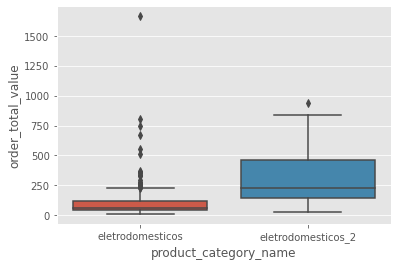

In [ ]:

df_eletro = df_olist[df_olist['product_category_name'].isin(['eletrodomesticos','eletrodomesticos_2'])]

sns.boxplot(data=df_eletro, y= 'order_total_value', x='product_category_name')

In [ ]:

df_olist['product_category_name'] = df_olist['product_category_name'].str.replace('_', ' ').str.lower()
df_olist['product_category_name'].head()


0              beleza saude
1    informatica acessorios
2                automotivo
3           cama mesa banho
4          moveis decoracao
Name: product_category_name, dtype: object

In [ ]:
#capitalize first character of each word
df_olist['customer_city'] = df_olist['customer_city'].str.title()
df_olist['customer_state'] = df_olist['customer_state'].str.upper()
df_olist['customer_state'].value_counts().head(7)

SP    41020
RJ    13486
MG    11977
RS     5586
PR     5027
SC     3747
BA     3459
Name: customer_state, dtype: int64

### <span style =' color:#FCA311'>  1.1.3 CONCLUSAO DA ANALISE DO NOME DAS CATEGORIAS DE PRODUTOS </span>

### Há diferença entre valores e quantidades de itens únicos entre as categorias 'casa_conforto' e 'casa_conforto_2' & 'eletrodomesticos' e 'eletrodomesticos_2'

### <span style =' color:#FCA311'>*1.1.3 CONCLUSION REGARDING PRODUCT NAME CATEGORY ANALISYS* </span>

### *There are differecences between 'casa_conforto' and 'casa_conforto_2' & between 'eletrodomesticos' and 'eletrodomesticos_2'*

## <span style =' color:#ffe200'>  2. VISUALIZAÇÃO DE DADOS - EDA
## <span style =' color:#ffe200'>*2. DATA VISUALIZATION - EDA*

### <span style =' color:#FCA311'>  2.1 VENDAS </span>
### <span style =' color:#FCA311'>*2.1 SALES*</span>

### Faturamento por estado

### *Revenue by state*

In [ ]:
pd.pivot_table(data=df_olist, values='order_total_value',
               index='customer_state', aggfunc=sum).sort_values(by='order_total_value',ascending=False)

,order_total_value
customer_state,
SP,5531820.39
RJ,2091366.68
MG,1761858.48
RS,869553.97
PR,764372.84
BA,602405.01
SC,587859.93
GO,329294.42
DF,325533.52


### Faturamento por categoria de produto

### *Revenue by product category*

In [ ]:
pd.pivot_table(data=df_olist, values='order_products_value',
               index='product_category_name', aggfunc=sum).sort_values(by='order_products_value',ascending=False)

,order_products_value
product_category_name,
relogios presentes,1337041.00
beleza saude,1081665.93
cama mesa banho,1056703.34
esporte lazer,961111.91
informatica acessorios,859228.95
...,...
cds dvds musicais,730.00
flores,679.20
fraldas higiene,509.00


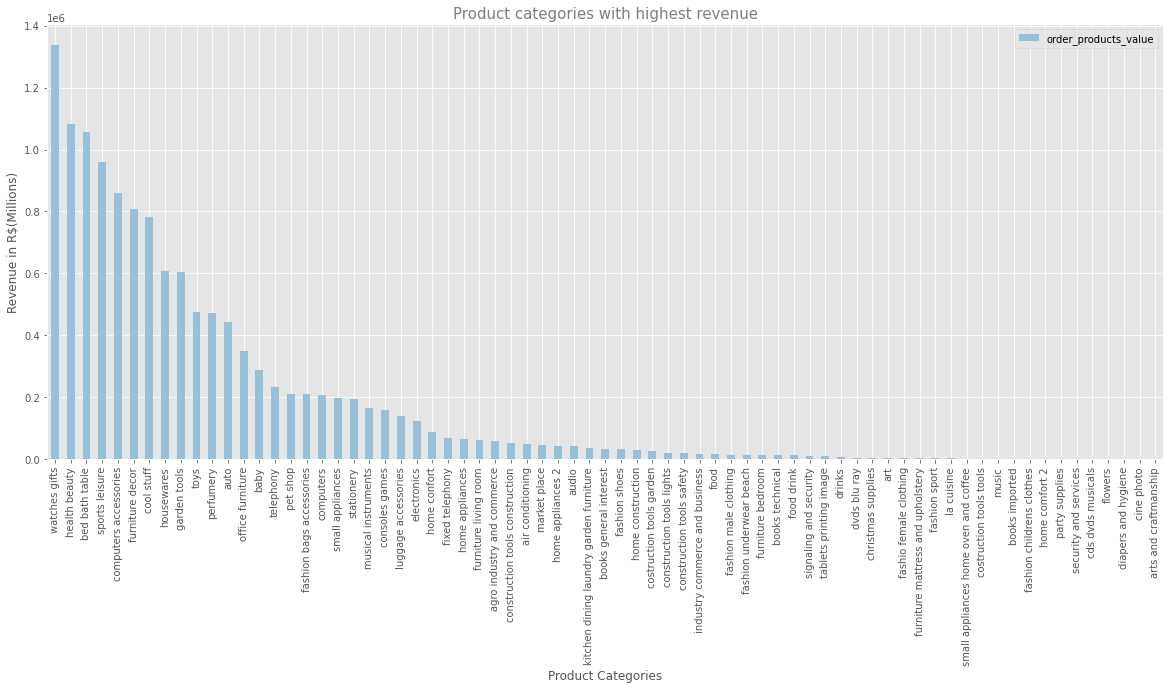

In [136]:
#category wise sales with their rating(top 20)
from turtle import color


df_olist.groupby(df_olist['categories_english'])['order_products_value'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),color='#98c1d9')
plt.title('Product categories with highest revenue', size=15, color='#7e7e7e')
plt.ylabel('Revenue in R$(Millions)')
plt.xlabel('Product Categories')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Categorias de produto com maior faturamento médio')

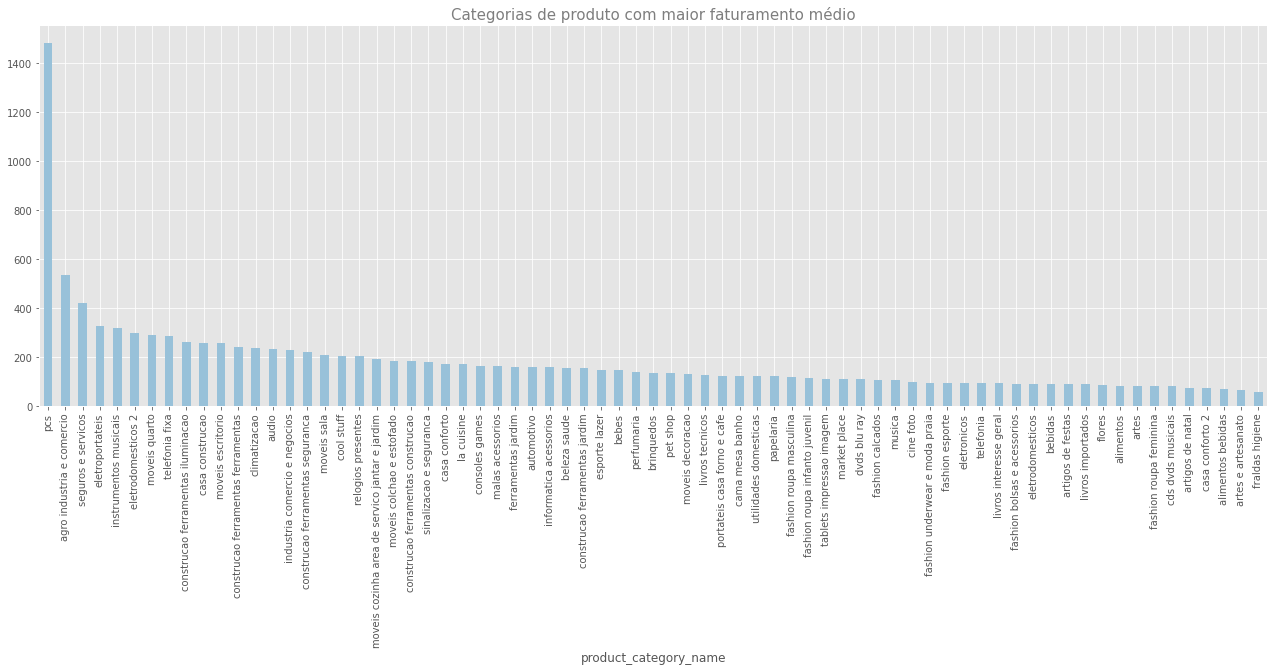

In [137]:

df_olist.groupby('product_category_name')['order_total_value'].mean().sort_values(ascending=False).plot(kind='bar', figsize = (22,7), color='#98c1d9')
plt.title('Categorias de produto com maior faturamento médio', size=15, color='#7e7e7e')

#sns.barplot(data=df_olist.groupby('product_category_name')['order_total_value'], x='product_category_name', y='order_total_value')

In [ ]:
teste= df_olist.groupby('product_category_name')['order_total_value']
teste

In [ ]:
df_olist['order_total_value'].describe()

count    100000.000000
mean        150.930905
std         203.896164
min           7.430000
25%          61.980000
50%         101.780000
75%         169.110000
max       13664.080000
Name: order_total_value, dtype: float64

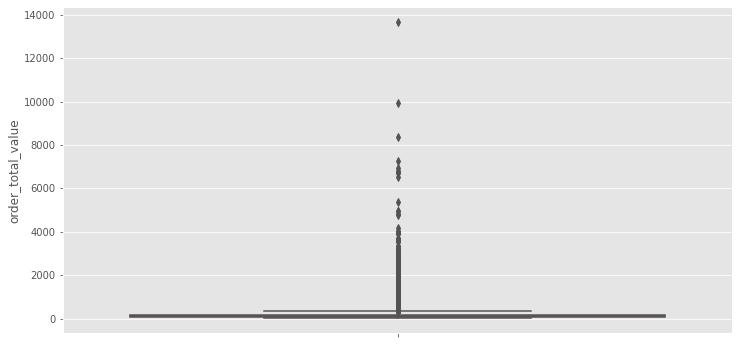

In [ ]:
df_olist['order_total_value']=df_olist['order_total_value'].astype(int)
df_olist.describe()

data_avaliacao = df_olist[(df_olist['order_total_value']>=2000) &(df_olist['order_total_value']<=13664)]
data_avaliacao.describe()
plt.figure(figsize=(12,6))
sns.boxplot(data=df_olist, y='order_total_value')
plt.show()

       order_products_value  order_freight_value  order_items_qty  \
count          96554.000000         96554.000000     96554.000000   
mean             103.450030            20.367284         1.089421   
std               82.592587            14.374864         0.399527   
min                2.000000             0.000000         1.000000   
25%               45.000000            13.390000         1.000000   
50%               79.900000            16.490000         1.000000   
75%              138.000000            22.110000         1.000000   
max              499.500000           239.000000        20.000000   

       order_sellers_qty  customer_zip_code_prefix  product_name_length  \
count       96554.000000              96554.000000         96554.000000   
mean            1.145224                351.804275            48.840245   
std             0.718665                297.473359            10.160072   
min             1.000000                 10.000000             5.000000   
25%

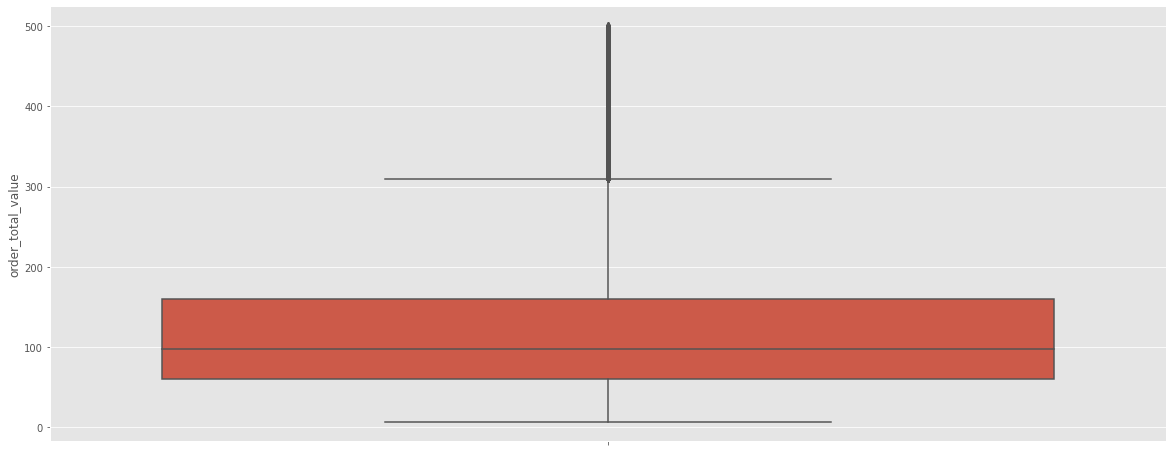

In [ ]:
data_avaliacao2 = df_olist[(df_olist['order_total_value']>0) &(df_olist['order_total_value']<=500)]
print(data_avaliacao2.describe())
plt.figure(figsize=(20,8))
sns.boxplot(data=data_avaliacao2, y='order_total_value')
plt.show()

c:\Users\rimellegari\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2000.0)

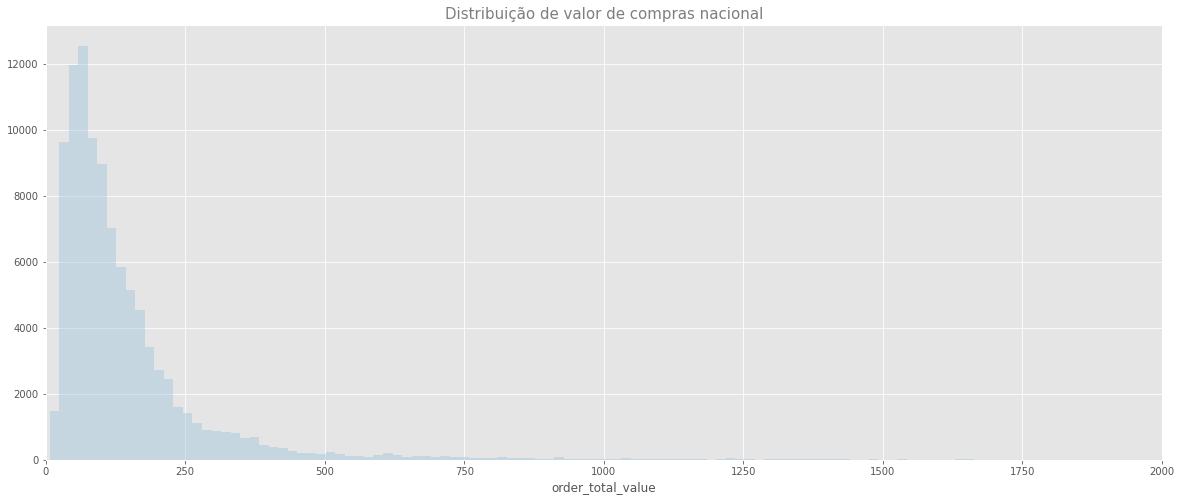

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Distribuição de valor de compras nacional', size=15, color='#7e7e7e')
sns.distplot(df_olist['order_total_value'], bins=800 ,kde=False, color='#98c1d9')
plt.xlim([0, 2000])